['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '7', '109', '164', '255', '141', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '82', '221', '255', '255', '255', '223', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '77', '237', '255', '255', '255', '255', '223', '0', '0', '0

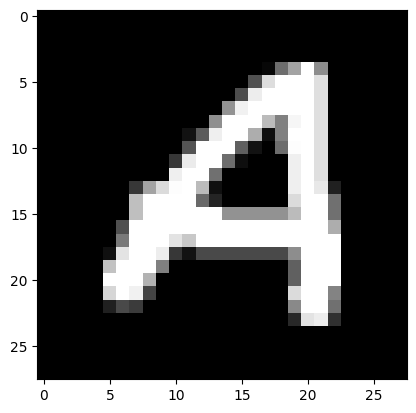

In [12]:
# import các thư viện cần thiết
import numpy as np
import csv
import matplotlib.pyplot as plt

# đọc dữ liệu từ file CSV
with open('hand_written.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)
        
# chọn một dòng từ dữ liệu, ở đây là dòng thứ 30000
letter = rows[2000]

# chuyển các giá trị từ string sang int và bỏ qua phần tử đầu tiên (có thể là nhãn)
x = np.array([int(j) for j in letter[1:]])

# chuyển đổi dữ liệu thành mảng 28x28
x = x.reshape(28, 28)

# in ra dòng đã chọn để kiểm tra
print(letter)

# hiển thị hình ảnh
plt.imshow(x, cmap='gray')
plt.show()

# train_data = [] # dữ liệu training
# train_label = [] # label của chúng
# i = 0
# for letter in rows:
#     if i < 10000:
#         x = np.array([int(j) for j in letter[1:]])
#         x = x.reshape(28, 28)
#         train_data.append(x)
#         train_label.append(int(letter[0]))
#         i = i+1

# print(len(train_label))

In [2]:
import random

shuffle_order = list(range(len(train_label)))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]
print("Success")

Success


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Định nghĩa mô hình mạng nơ-ron tích chập
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Lớp tích chập đầu tiên
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Lớp tích chập thứ hai
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Lớp fully connected (lớp kết nối đầy đủ)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Giả sử input image size là 28x28
        self.fc2 = nn.Linear(128, 10)  # 10 lớp output (cho 10 class)

        # Lớp dropout
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # Lớp tích chập 1 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv1(x)))
        
        # Lớp tích chập 2 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flattening (biến đổi dữ liệu thành 1 chiều để đưa vào fully connected)
        x = x.view(-1, 64 * 7 * 7)
        
        # Fully connected layer 1 với dropout
        x = self.dropout(F.relu(self.fc1(x)))
        
        # Fully connected layer 2 (output)
        x = self.fc2(x)
        
        return x

# Khởi tạo mô hình
model = ConvNet()

# Định nghĩa loss function và optimizer
criterion = nn.CrossEntropyLoss()  # Loss function cho phân loại đa lớp
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Chuyển đổi nhãn thành one-hot encoding trong PyTorch sử dụng nn.functional
def to_categorical(y, num_classes):
    return F.one_hot(y, num_classes)

# Giả sử input là batch hình ảnh 28x28
input_data = torch.randn(32, 1, 28, 28)  # Batch size 32, 1 channel, kích thước 28x28
output = model(input_data)

print(output.shape)  # Kiểm tra output

torch.Size([32, 10])


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Giả sử train_data và train_label đã được tải hoặc xử lý trước
# Ví dụ: train_data = np.load('train_data.npy'), train_label = np.load('train_label.npy')

# Chia dữ liệu thành tập huấn luyện và tập test (80% train, 20% test)
train_x, test_x, train_y, test_y = train_test_split(train_data, train_label, test_size=0.2, random_state=42)

# Chia thêm tập huấn luyện thành tập huấn luyện và tập xác thực (validation)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Các tham số mô hình
BATCH_SIZE = 32
IMG_SIZE = 28
N_CLASSES = 4
LR = 0.001
N_EPOCHS = 50

# Định nghĩa mô hình CNN
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Lớp tích chập 1 (32 filters, kernel size 3x3)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Lớp tích chập 2 (64 filters, kernel size 3x3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Lớp tích chập 3
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Lớp max pooling (kích thước nhỏ hơn để tránh thu nhỏ quá nhanh)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Lớp fully connected (kết nối đầy đủ)
        self.fc1 = nn.Linear(32 * 3 * 3, 1024)  # Đã điều chỉnh kích thước
        self.fc2 = nn.Linear(1024, N_CLASSES)  # 4 lớp output (cho 4 class)
        
        # Lớp dropout
        self.dropout = nn.Dropout(0.8)
        
    def forward(self, x):
        # Conv1 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv1(x)))
        
        # Conv2 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv2(x)))
        
        # Conv3 -> ReLU -> MaxPool (giảm bớt số lớp pooling)
        x = self.pool(F.relu(self.conv3(x)))
        
        # Flattening
        x = x.view(-1, 32 * 3 * 3)  # Kích thước điều chỉnh sau pooling
        
        # Fully connected layer 1 với dropout
        x = self.dropout(F.relu(self.fc1(x)))
        
        # Fully connected layer 2 (output layer)
        x = self.fc2(x)
        
        return x

# Khởi tạo mô hình
model = ConvNet()

# Định nghĩa loss function và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Giả sử input là batch hình ảnh 28x28
input_data = torch.randn(BATCH_SIZE, 1, IMG_SIZE, IMG_SIZE)  # Batch size 32, 1 channel, kích thước 28x28
output = model(input_data)

print(output.shape)  # Kiểm tra kích thước output

torch.Size([32, 4])


In [6]:
train_x = train_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
val_x = val_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_x = test_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [7]:
import torch
import torch.nn.functional as F

# Chuyển đổi numpy array thành tensor trước khi sử dụng F.one_hot
train_y = torch.tensor(train_y, dtype=torch.long)
val_y = torch.tensor(val_y, dtype=torch.long)
test_y = torch.tensor(test_y, dtype=torch.long)

# Sử dụng F.one_hot để chuyển thành one-hot encoding
train_y = F.one_hot(train_y, N_CLASSES)
val_y = F.one_hot(val_y, N_CLASSES)
test_y = F.one_hot(test_y, N_CLASSES)

In [8]:
import torch

# Nếu train_x và train_y là numpy arrays, hãy chuyển đổi chúng sang Tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.long)  # Đối với nhãn, dùng dtype long cho bài toán phân loại

val_x = torch.tensor(val_x, dtype=torch.float32)
val_y = torch.tensor(val_y, dtype=torch.long)
# Tạo DataLoader sau khi chắc chắn rằng train_x và train_y là tensor và có cùng số mẫu
train_data = torch.utils.data.TensorDataset(train_x, train_y)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = torch.utils.data.TensorDataset(val_x, val_y)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_8561/2923646694.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_y, dtype=torch.long)  # Đối với nhãn, dùng dtype long cho bài toán phân loại
/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_8561/2923646694.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_y = torch.tensor(val_y, dtype=torch.long)


In [10]:
# Giả sử bạn đã có các biến: train_x, train_y, val_x, val_y dưới dạng PyTorch Tensor
for inputs, labels in train_loader:
    # Thay đổi thứ tự từ NHWC (batch_size, height, width, channels) sang NCHW (batch_size, channels, height, width)
    inputs = inputs.permute(0, 3, 1, 2)  # Từ (B, H, W, C) -> (B, C, H, W)
    
    optimizer.zero_grad()  # Đặt lại gradient
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs, labels)  # Tính loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Cập nhật trọng số
# Các tham số cần thiết
N_EPOCHS = 50
BATCH_SIZE = 32
LR = 0.001

# Định nghĩa loss function và optimizer
criterion = nn.CrossEntropyLoss()  # Sử dụng CrossEntropy cho bài toán phân loại
optimizer = torch.optim.Adam(model.parameters(), lr=LR)  # Optimizer Adam

# Tạo DataLoader để chia dữ liệu thành các batch
train_data = torch.utils.data.TensorDataset(train_x, train_y)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = torch.utils.data.TensorDataset(val_x, val_y)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

# Vòng lặp huấn luyện
for epoch in range(N_EPOCHS):
    model.train()  # Chuyển mô hình sang chế độ huấn luyện
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Đặt lại gradient
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Tính loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Cập nhật trọng số
        
        # Tính toán các chỉ số
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # In ra loss và accuracy trên tập huấn luyện
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{N_EPOCHS}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

    # Đánh giá trên tập validation
    model.eval()  # Chuyển mô hình sang chế độ đánh giá
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():  # Tắt tính toán gradient cho tập validation
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

RuntimeError: Expected floating point type for target with class probabilities, got Long

In [ ]:
# Lưu các tham số của mô hình (state_dict)
torch.save(model.state_dict(), 'mymodel.pth')

In [ ]:
# Khởi tạo lại kiến trúc mô hình
model = ConvNet()  # Phải giống với kiến trúc đã lưu

# Tải tham số vào mô hình
model.load_state_dict(torch.load('mymodel.pth'))
# Chuyển mô hình sang chế độ đánh giá (không cần huấn luyện nữa)
model.eval()



In [ ]:
# dự đoán với tập dữ liệu test
test_logits = model.predict(test_x)
#lấy phần tử có giá trị lớn nhất 
test_logits = np.argmax(test_logits, axis=-1)


In [ ]:
print(np.sum(test_logits == original_test_y) / len(test_logits))
#result: 0.9964297306069458
